In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib as mpl

sns.set_style('whitegrid')

# For reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
tech_list = ['AAPL', 'GOOG', 'AMZN'] 

In [3]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [4]:
for stock in tech_list:
    globals()[stock] = web.DataReader(stock,'quandl',start,end)

In [5]:
AAPL.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.0,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,148.288404,149.233090,147.331113,148.378609,2.661565e+07,0.007349,1.0,147.639394,148.579832,146.685160,147.728366,2.661565e+07
std,15.346051,15.424639,15.016814,15.199087,1.113973e+07,0.066758,0.0,15.842002,15.923735,15.509549,15.694944,1.113973e+07
min,115.590000,116.330000,114.760000,115.820000,1.394898e+07,0.000000,1.0,114.162295,114.893155,113.342546,114.389454,1.394898e+07
25%,140.720000,141.500000,139.890000,140.680000,2.021931e+07,0.000000,1.0,139.580148,140.353830,138.756871,139.540472,2.021931e+07
50%,149.900000,150.900000,148.670000,150.080000,2.371296e+07,0.000000,1.0,149.294246,150.290205,147.969621,149.473519,2.371296e+07
75%,158.470000,159.770000,157.650000,157.870000,2.930786e+07,0.000000,1.0,158.230000,159.770000,157.630423,157.870000,2.930786e+07
max,175.110000,176.095000,174.645900,175.880000,1.119850e+08,0.630000,1.0,175.110000,176.095000,174.645900,175.880000,1.119850e+08


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2017-12-15 to 2016-12-19
Data columns (total 12 columns):
Open          249 non-null float64
High          249 non-null float64
Low           249 non-null float64
Close         249 non-null float64
Volume        249 non-null float64
ExDividend    249 non-null float64
SplitRatio    249 non-null float64
AdjOpen       249 non-null float64
AdjHigh       249 non-null float64
AdjLow        249 non-null float64
AdjClose      249 non-null float64
AdjVolume     249 non-null float64
dtypes: float64(12)
memory usage: 25.3 KB


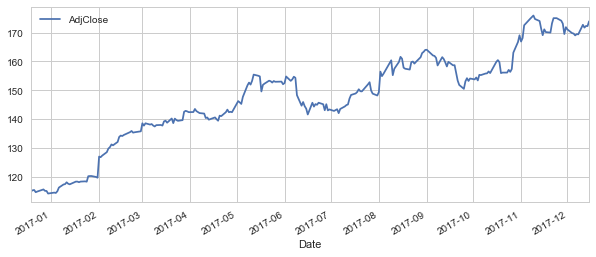

In [7]:
AAPL['AdjClose'].plot(legend = True, figsize = (10,4))

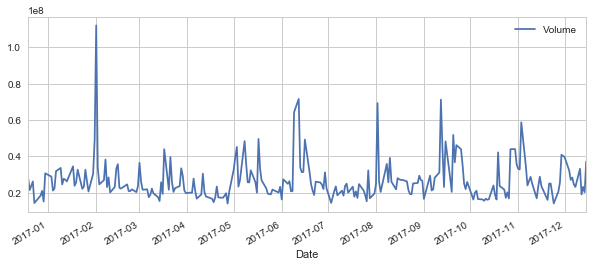

In [8]:
AAPL.Volume.plot(legend = True, figsize = (10,4))

# For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [9]:
ma_day = [10,20,50]

In [10]:
#Rolling mean, - moving average for certain days
for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL.AdjClose, ma)

c:\programdata\anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
c:\programdata\anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
c:\programdata\anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


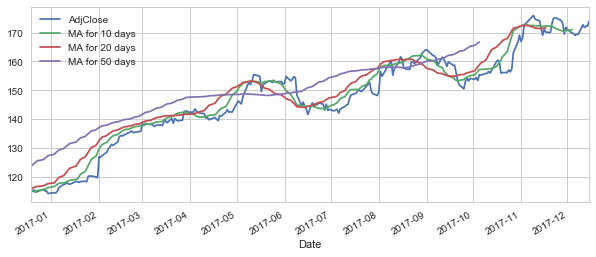

In [11]:
AAPL[['AdjClose', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False,
    figsize = (10,4))

In [12]:
AAPL['Daily Return'] = AAPL['AdjClose'].pct_change()

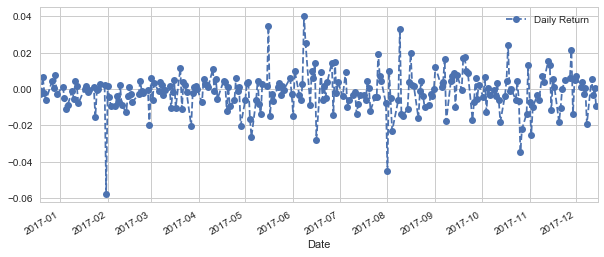

In [13]:
AAPL['Daily Return'].plot(figsize = (10,4), legend = True, linestyle = '--', marker = 'o')

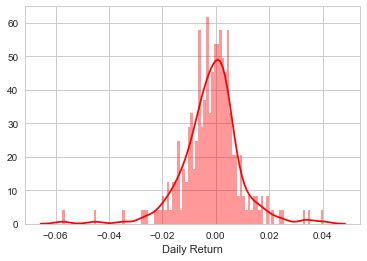

In [14]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'red')

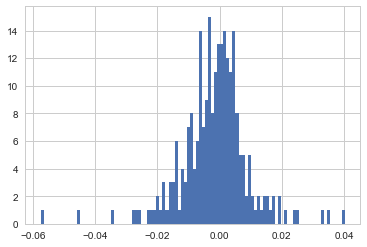

In [15]:
AAPL['Daily Return'].hist(bins = 100)

In [21]:
closing_df = web.DataReader(tech_list,'google',start,end)

c:\programdata\anaconda3\lib\site-packages\pandas_datareader\base.py:201: SymbolWarning: Failed to read symbol: 'AAPL', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
c:\programdata\anaconda3\lib\site-packages\pandas_datareader\base.py:201: SymbolWarning: Failed to read symbol: 'GOOG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
c:\programdata\anaconda3\lib\site-packages\pandas_datareader\base.py:201: SymbolWarning: Failed to read symbol: 'AMZN', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


RemoteDataError: No data fetched using 'GoogleDailyReader'

In [ ]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)